In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv10 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [2]:
designated_ukc_cls = 5
embedding_size = 12
# num_classes= 3
pt_epochs = 2
ukc_label=7
octrain_epochs = 1
lr_rate = 2.5
wait_patience = 8
optimizer = 'adam'

oset = OpenSet()

In [3]:
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=500,
                                                          designated_ukc_cls=5)
# print(oset.tracker)
# oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=False,                                 
#                                    )

padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 400, val_0:, 50, test_0:, 50, train_1:, 400, val_1:, 50, test_1:, 50, train_2:, 400, val_2:, 50, test_2:, 50, train_3:, 400, val_3:, 50, test_3:, 50, train_4:, 400, val_4:, 50, test_4:, 50, class 5 is added as ukc
ukc_5:, 50
length of train_data - (num_seq_per_cls * num_class)// batch size: 62


got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-04-26 20:13:05.488013
starting to create ptmodel automatically
staring pre trining
Epoch 1/6
62/62 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.7077 - precision: 0.8823 - recall: 0.5363
Epoch 1: val_accuracy improved from -inf to 0.87946, saving model to data\ptmodel_2022-04-26_20_13_05.488013\
INFO:tensorflow:Assets written to: data\ptmodel_2022-04-26_20_13_05.488013\assets
62/62 [==============================] - 8s 113ms/step - loss: 0.7233 - accuracy: 0.7077 - precision: 0.8823 - recall: 0.5363 - val_loss: 0.3245 - val_accuracy: 0.8795 - val_precision: 0.8991 - val_recall: 0.8750 - lr: 0.0010
Epoch 2/6
62/62 [==============================] - ETA: 0s - loss: 0.1710 - accuracy: 0.9400 - precision: 0.9496 - recall: 0.9304
Epoch 2: val_accuracy improved from 0.87946 to 0.96875, saving model to da

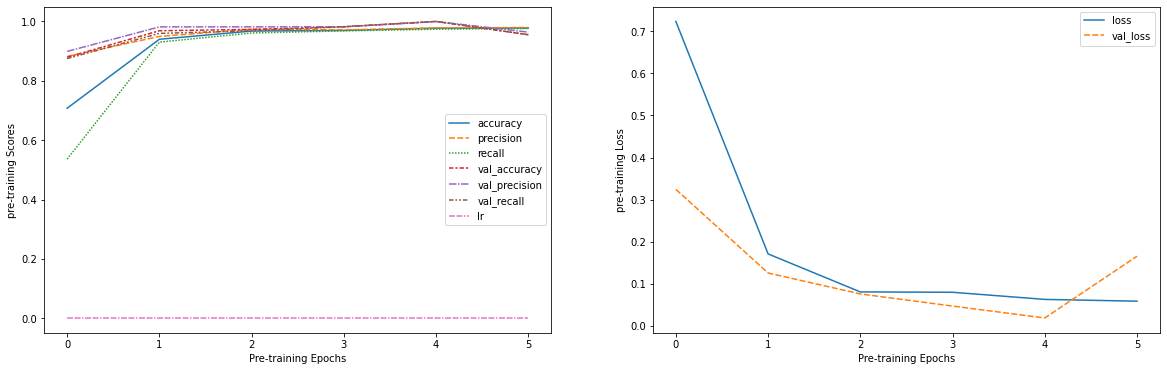

run_id:  2022-04-26_20_13_45.751022_468fbf4cc56f11ec8594ac8247733f47


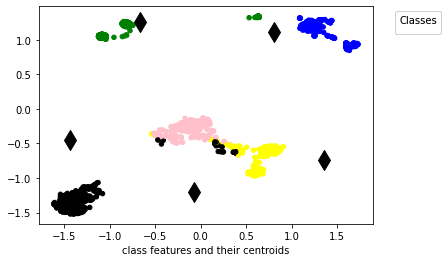

run_id:  2022-04-26_20_14_02.525337_508f4dfdc56f11ecb136ac8247733f47


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.44it/s]


epoch: 1/10, train_loss: 4.497462272644043, F1_train: 0.11106885781411391 F1_val: 0.12726340536214484


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.48it/s]


epoch: 2/10, train_loss: 4.4794769287109375, F1_train: 0.19501930551874314 F1_val: 0.21920354860477115


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.52it/s]


epoch: 3/10, train_loss: 4.4985432624816895, F1_train: 0.34823287600296016 F1_val: 0.35543960008245723


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.35it/s]


epoch: 4/10, train_loss: 4.489633560180664, F1_train: 0.4373208856689272 F1_val: 0.39272008683281007


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.35it/s]


epoch: 5/10, train_loss: 4.491981029510498, F1_train: 0.5194592300938372 F1_val: 0.4691458766353474


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.55it/s]


epoch: 6/10, train_loss: 4.494741439819336, F1_train: 0.6341433184686222 F1_val: 0.4966895530663646


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.24it/s]


epoch: 7/10, train_loss: 4.491486549377441, F1_train: 0.6933051096264894 F1_val: 0.4978960955940204


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.04it/s]


epoch: 8/10, train_loss: 4.495336055755615, F1_train: 0.7366688861213114 F1_val: 0.5481859879870224


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.03it/s]


epoch: 9/10, train_loss: 4.493500232696533, F1_train: 0.7759255697298577 F1_val: 0.5700905536530249


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:08<00:00,  7.50it/s]


epoch: 10/10, train_loss: 4.491887092590332, F1_train: 0.7935053703064504 F1_val: 0.5880684190574047


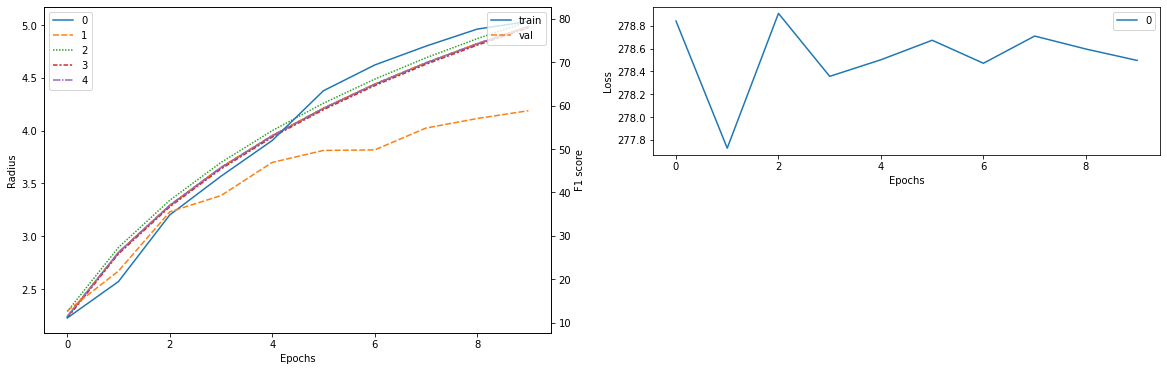

classification report for training:
[[298   0   0   0   0  99]
 [  0 228   0   0   0 171]
 [  0   0 273   0   0 123]
 [  0   0   0 214   0 182]
 [  0   0   0   0 306  90]
 [  0   0   0   0   0   0]]
66.48
f1_weighted: 0.7948102387680813, f1_macro: 0.6624007329870457, f1_micro: 0.6648185483870968, f_measure: {'Known': 79.4881, 'Open': 0, 'F1-score': 66.2401}
              precision    recall  f1-score   support

           0       1.00      0.75      0.86       397
           1       1.00      0.57      0.73       399
           2       1.00      0.69      0.82       396
           3       1.00      0.54      0.70       396
           4       1.00      0.77      0.87       396
           7       0.00      0.00      0.00         0

    accuracy                           0.66      1984
   macro avg       0.83      0.55      0.66      1984
weighted avg       1.00      0.66      0.79      1984

classification report for test data:
[[ 0  0  0  0  0  0 47]
 [ 0 18  0  0  0  0 31]
 [ 0  0 44  

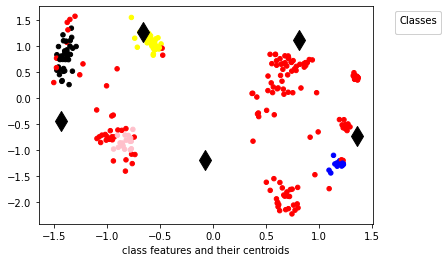

INFO:tensorflow:Assets written to: ram://b7f0cd50-efd3-4eb5-a107-037918fed725/assets


In [4]:
res = oset.train(train_data=train_data, val_data=val_data,
                                    test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                                   pt_epochs=6, oc_epochs=10, )

In [5]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog, manual_color_map=True,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',                 
#                 )

In [6]:
# res = oset.train(train_data=train_data, val_data=val_data,
#                                     test_data=test_data, bglog=bglog,                                 
#                                    pt_epochs=3, oc_epochs=10, ptmodel_get_mode='import',  
#                  manual_color_map=False, centroid_class_color=True,
#                 )

In [7]:
# plist = ['bg_class_obj', 'train_data', 'val_data', 'test_data', 'bglog']
# for i in plist:
#     oset.tracker.pop(i)

In [8]:
# s = oset.update_tracker('mytest.xlsx', oset.tracker )

In [9]:
# import pickle
# f = pickle.dumps(oset)